In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [2]:
file_df = pd.read_csv("Resources/loanData.csv")
file_df

clean_df = file_df.dropna()
clean_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
clean_df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [3]:
clean_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
encoded_df = pd.get_dummies(clean_df[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term","Credit_History", "Property_Area", "Loan_Status"]], drop_first=True)
encoded_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


## Legend:

##### Gender
0 Female
1 Male

##### Married
0 No
1 Yes

#### Dependents (0, 1, 2, 3+)  All 0 => Dependents = 0
##### Dependents_1
0 No
1 Yes

##### Dependents_2
0 No
1 Yes

##### Dependents_3+
0 No
1 Yes

##### Education
0 Graduate
1 Not Graduate

##### Self-Employed
0 No
1 Yes

#### Property_Area (Rural, Semiurban, Urban)  All 0 => Property_Area = Rural
##### Property_Area_Semiurban
0 No
1 Yes

##### Property_Area_Urban
0 No
1 Yes

##### Loan_Status
0 No
1 Yes

In [5]:
#y
target = encoded_df['Loan_Status_Y']
target_names = ['denied', 'approved']

# X = encoded_df.drop(columns=['Loan_Status_Y'])
# y = encoded_df['Loan_Status_Y']

In [6]:
#X
data = encoded_df.drop('Loan_Status_Y', axis = 1)
feature_names = data.columns
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1


In [7]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,stratify=target, random_state=42)
# 75/25 split

In [8]:
y_train.value_counts()

1    249
0    111
Name: Loan_Status_Y, dtype: int64

In [9]:
y_test.value_counts()

1    83
0    37
Name: Loan_Status_Y, dtype: int64

#### Decision Tree

In [10]:
#Decision Tree 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7583333333333333

In [11]:
#Sort features by their importance 
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

NameError: name 'rf' is not defined

In [ ]:
#Decision Tree predictions
predictions = clf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
#Decision Tree predictions
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
#116 got wrong

#### Random Forest

In [ ]:
#Random Forest
rf = RandomForestClassifier(max_leaf_nodes=4,max_depth=9,n_estimators=700,n_jobs=-1,)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
#Random Forrest predictions
predictions_rf = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions_rf[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
#Random Forrest predictions
pd.DataFrame({"Prediction": predictions_rf, "Actual": y_test}).reset_index(drop=True)
#116 got wrong

#### Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
#Logistic Regression - making predictions
predictions_lr = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions_lr[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
#Logistic Regression - making predictions
pd.DataFrame({"Prediction": predictions_lr, "Actual": y_test}).reset_index(drop=True)

#### K-Nearest Neighbor

In [ ]:
#K-NN benefits from normalization - use Standard Scaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show();

In [ ]:
# Note that k: 19 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

#### Support Vector Machine (SVM)

In [ ]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

In [ ]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions_svm = model.predict(X_test)
print(classification_report(y_test, predictions_svm,
                            target_names=target_names))

In [ ]:
#Save the trained model
#pickle or joblib https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/ 

#AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [212]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score,recall_score,mean_squared_error ,classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [191]:
import warnings
import sklearn
import pandas as pd

In [248]:
file_df.head().T
file_df1 = file_df.drop(labels=["Loan_ID"],axis=1)

In [217]:
file_df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [249]:
X = file_df1.iloc[:,:-1]
y = file_df1.iloc[:,-1]

In [250]:
cat_col = X.select_dtypes(include="object").columns.to_list()
cat_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [251]:
num_col = X.select_dtypes(exclude="object").columns.to_list()

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42)

In [253]:
lg = LogisticRegression( max_iter= 400 ,n_jobs= -1 ,l1_ratio= .2)

In [275]:
lg = GradientBoostingClassifier(n_estimators=4000,learning_rate=0.05,
#                                 max_depth=6,
                               validation_fraction=0.2,
                               n_iter_no_change=10, tol=0.01,
                               random_state=42)

In [276]:
#from xgboost import XGBRegressor 

In [277]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])



preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, cat_col),
     ('num', numerical_pipe, num_col)],
    

)

rf = Pipeline([
    ('preprocess', preprocessing),
    ('feature_selection', SelectFromModel(lg, prefit=False)),
    ('classifier', lg)
])


In [278]:
rf.fit(X_train,y_train);

In [279]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.798
RF test accuracy: 0.857


In [280]:
y_pred = rf.predict(X_test)

In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.96      0.56      0.71        48
           Y       0.83      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.87      0.86      0.84       154



In [282]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [283]:
name_arr = np.array(get_feature_names(rf.steps[0][1]))

/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available


In [297]:
# name_arr

In [298]:
# coef = rf.steps[1][1].estimator_.coef_
# coef[0].shape

In [299]:
# pd.DataFrame.from_dict({
#     "name_arr" : name_arr,
#     "coef" :coef[0]
# })

/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer imputer (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
/Users/medinai/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


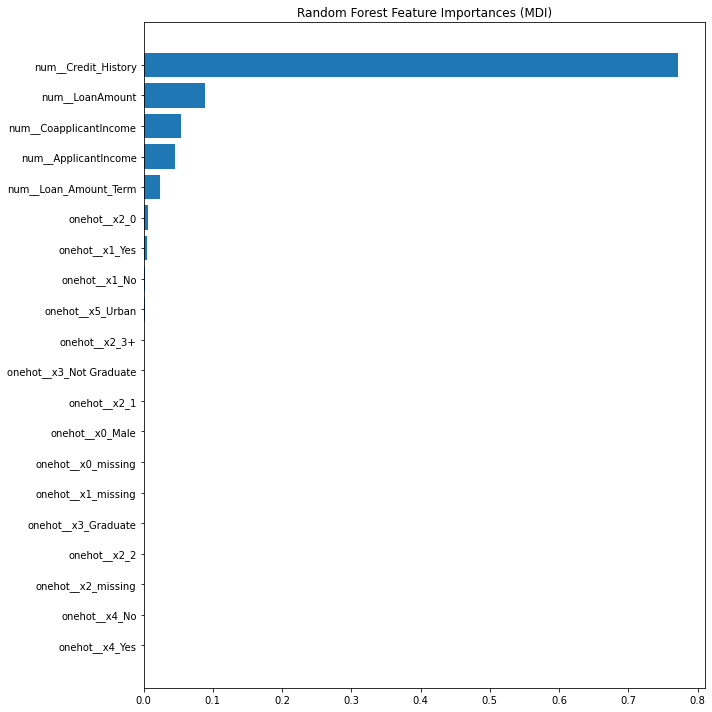

In [300]:
y_ticks = np.arange(0, 20)
sorted_idx = rf.steps[1][1].estimator_.feature_importances_.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(np.array(get_feature_names(rf.steps[0][1]))[sorted_idx][-20:], rf.steps[1][1].estimator_.feature_importances_[sorted_idx][-20:])
ax.set_yticklabels(np.array(get_feature_names(rf.steps[0][1]))[sorted_idx][-20:])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [301]:
X_train.iloc[1,:].to_dict()

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 3100,
 'CoapplicantIncome': 1400.0,
 'LoanAmount': 113.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}

In [302]:
pd.DataFrame.from_dict({'Gender': ['Male'],
 'Married': ['Yes'],
 'Dependents': ['2'],
 'Education': ['Graduate'],
 'Self_Employed': ['No'],
 'ApplicantIncome': [3100],
 'CoapplicantIncome': [1400.0],
 'LoanAmount': [113.0],
 'Loan_Amount_Term': [360.0],
 'Credit_History': [1.0],
 'Property_Area': 'Urban'})

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban


In [312]:
rf.predict(pd.DataFrame.from_dict({'Gender': ['Male'],
 'Married': ['Yes'],
 'Dependents': ['0'],
 'Education': ['Graduate'],
 'Self_Employed': ['No'],
 'ApplicantIncome': [3100],
 'CoapplicantIncome': [14000.0],
 'LoanAmount': [113.0],
 'Loan_Amount_Term': [360.0],
 'Credit_History': [1.0],
 'Property_Area': ['Urban']}))[0]

'Y'

- post requist from the front end and the body will be json object 

```
{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 3100,
 'CoapplicantIncome': 1400.0,
 'LoanAmount': 113.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}
```

- on the backend in the flask app 

```
{Gender,
 Married,
 Dependents,
 Education,
 Self_Employed,
 ApplicantIncome,
 CoapplicantIncome,
 LoanAmount,
 Loan_Amount_Term,
 Credit_History,
 Property_Area}= requist.body
```

- usr the model like this 

```
rf.predict(pd.DataFrame.from_dict({'Gender': [Gender],
 'Married': [Married],
 'Dependents': [Dependents],
 'Education': ['Graduate'],
 'Self_Employed': ['No'],
 'ApplicantIncome': [3100],
 'CoapplicantIncome': [1400.0],
 'LoanAmount': [113.0],
 'Loan_Amount_Term': [360.0],
 'Credit_History': [1.0],
 'Property_Area': ['Urban']}))[0]
 ```

In [314]:
#Saving model with joblib
# save the model to disk
import joblib

# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(rf, filename)
 
#load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)


0.8571428571428571


In [315]:
# Saving model with pickle
import pickle

# save the model to disk
filename_pickle = 'finalized_model_pickle.sav'
pickle.dump(rf, open(filename_pickle, 'wb'))

# load the model from disk
loaded_model_pickle = pickle.load(open(filename_pickle, 'rb'))
result_pickle = loaded_model_pickle.score(X_test, y_test)
print(result_pickle)

0.8571428571428571
